__________
# Shit gets real here

### Dataset and Imports

In [1]:
import time
from tqdm.notebook import tqdm, trange
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold

In [2]:
data_all = pd.read_pickle('../training_dataset_task3/task_3_training_e8da4715deef7d56_f8b7378_pandas.pkl')
data = data_all.loc[:,'pianist_id':'arousal']

X = data.drop(['quadrant', 'valence', 'arousal'], axis=1)
y = data['quadrant']

# preprocess dataset
X = StandardScaler().fit_transform(X)

# cross validation
kf = KFold(n_splits=10)

In [3]:
def cross_val(model, kf=kf):
    val = cross_val_score(estimator=model, X=X, y=y, cv=kf).mean()
    # print(val, 'for', model)
    return val

# Focus: Random Forests

In [4]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

#### The hyperparameters

**n_estimators:** int, default=100
The number of trees in the forest.

**criterion:** {“gini”, “entropy”}, default=”gini” <br>
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.

**max_depth:** int, default=None <br>
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_split:** int or float, default=2 <br>
The minimum number of samples required to split an internal node: <br>
If int, then consider min_samples_split as the minimum number. <br>
If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

**min_samples_leaf:** int or float, default=1 <br>
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression. <br>
If int, then consider min_samples_leaf as the minimum number. <br>
If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

**min_weight_fraction_leaf:** float, default=0.0 <br>
The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

**max_features:**: {“auto”, “sqrt”, “log2”} int or float, default=”auto” <br>
The number of features to consider when looking for the best split: <br>
If int, then consider max_features features at each split. <br>
If float, then max_features is a fraction and round(max_features * n_features) features are considered at each split. <br>
If “auto”, then max_features=sqrt(n_features). <br>
If “sqrt”, then max_features=sqrt(n_features) (same as “auto”). <br>
If “log2”, then max_features=log2(n_features). <br>
If None, then max_features=n_features. <br>
Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.

**max_leaf_nodes:** int, default=None <br>
Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

**min_impurity_decrease:** float, default=0.0 <br>
A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

The weighted impurity decrease equation is the following: <br>
N_t / N * (impurity - N_t_R / N_t * right_impurity
                    - N_t_L / N_t * left_impurity) <br>
where N is the total number of samples, N_t is the number of samples at the current node, N_t_L is the number of samples in the left child, and N_t_R is the number of samples in the right child. <br>
N, N_t, N_t_R and N_t_L all refer to the weighted sum, if sample_weight is passed.


**bootstrap:** bool, default=True <br>
Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.

**oob_score:** bool, default=False <br>
Whether to use out-of-bag samples to estimate the generalization score. Only available if bootstrap=True.

**n_jobs:** int, default=None <br>
The number of jobs to run in parallel. fit, predict, decision_path and apply are all parallelized over the trees. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors.

**random_state:** int RandomState instance or None, default=None <br>
Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features). See Glossary for details.

**verbose:** int, default=0 <br>
Controls the verbosity when fitting and predicting.

**warm_start:** bool, default=False <br>
When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest. See the Glossary.

**class_weight:** {“balanced”, “balanced_subsample”} dict or list of dicts, default=None <br>
Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.

**ccp_alpha:** non-negative float, default=0.0 <br>
Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. By default, no pruning is performed. See Minimal Cost-Complexity Pruning for details.

**max_samples:** int or float, default=None <br>
If bootstrap is True, the number of samples to draw from X to train each base estimator. <br>
If None (default), then draw X.shape[0] samples. <br>
If int, then draw max_samples samples. <br>
If float, then draw max_samples * X.shape[0] samples. Thus, max_samples should be in the interval (0.0, 1.0].

In [5]:
# Random Forest - no parameter specification

# start = time.time()
# rf0 = RandomForestClassifier()
# val0 = cross_val(rf0)
# end = time.time()
# runtime = f'{end-start} seconds'

# print(f'Score for {rf0}:')
# print(f'{val0} in {runtime} runtime.')

In [6]:
# Random Forest - n_estimators=10, criterion=gini(default), max_deph=5, max_features=1

# start = time.time()
# rf1 = RandomForestClassifier(n_estimators=10, max_depth=5, max_features=1)
# val1 = cross_val(rf1)
# end = time.time()
# runtime = f'{end-start} seconds'

# print(f'Score for {rf1}:')
# print(f'{val1} in {runtime} runtime.')

## Hyperparameter - n_estimators (number of trees in forest)

In [7]:
# trial 1

start = time.time()
# uncomment next line will take forever
# accuracies = [cross_val(RandomForestClassifier(n_estimators=i)) for i in trange(10,300,10)]
end = time.time()

print(end-start, 'seconds runtime')

0.0 seconds runtime


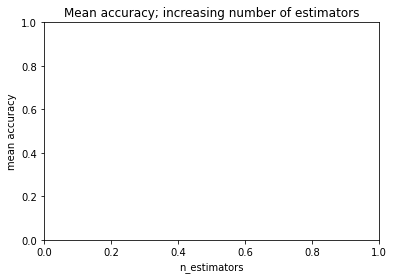

In [8]:
# plot
# plt.plot(range(10,300,10), accuracies)
plt.title('Mean accuracy; increasing number of estimators')
plt.xlabel('n_estimators')
plt.ylabel('mean accuracy')
plt.show()

In [9]:
# Result
# picture of plot saved as 'n_estimators_10_300_10.png'
# runtime: not yet measured

In [10]:
# trial 2

start = time.time()
# uncomment next line will take forever
# accuracies2 = [cross_val(RandomForestClassifier(n_estimators=i)) for i in trange(240,340,10)]
end = time.time()

print(end-start, 'seconds runtime')

0.0 seconds runtime


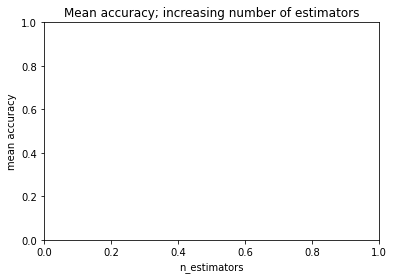

In [11]:
# plot
# plt.plot(range(240,340,10), accuracies2)
plt.title('Mean accuracy; increasing number of estimators')
plt.xlabel('n_estimators')
plt.ylabel('mean accuracy')
plt.show()

In [12]:
# Result
# picture of plot saved as 'n_estimators_240_340_10.png'
# runtime: 473 seconds or 7.88 minutes runtime

### Facit

Increasing the numbers of trees does not make a huge difference that justifies the extremely long runtime.<br>
Let's settle on **80 trees**, which has around 0.47% accuracy and play with some other parameters instead!

## Hyperparameter - Criterion

In [13]:
# gini is default; try for 'entropy'

start = time.time()
# rf_80_entropy = RandomForestClassifier(n_estimators=80, criterion='entropy')
# val_80_entropy = cross_val(rf_80_entropy)
end = time.time()
runtime = f'{end-start} seconds'

# print(f'Score for {rf_80_entropy}:')
# print(f'{val_80_entropy} in {runtime} runtime.')

### Facit

Varying between gini and entropy does not make a huge difference, so we will stick with the default value, **gini**.

## Hyperparameter - Max_Depth and Min_Sample_Split

**Max_depth** defines how deep each single tree goes. <br>
So far, we have not defined a maximum depth, therefore
the algorithm continued to split the nodes until min_sample_split, which was by default 2. <br>
Let's play around with these parameters.

In [14]:
# trial 1

start = time.time()
# uncomment next line will take forever
# accuracies3 = [cross_val(RandomForestClassifier(n_estimators=80, max_depth=i)) for i in trange(5,30)]
end = time.time()

print(end-start, 'seconds runtime')

0.0 seconds runtime


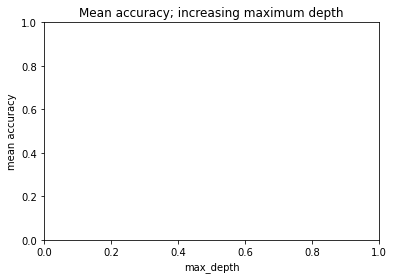

In [15]:
# plot
# plt.plot(range(5,30), accuracies3)
plt.title('Mean accuracy; increasing maximum depth')
plt.xlabel('max_depth')
plt.ylabel('mean accuracy')
plt.show()

In [16]:
# Result
# picture of plot saved as 'max_depth_5_30.png'
# runtime: 312 seconds or 5.2 minutes runtime

In [17]:
# trial 2

start = time.time()
# uncomment next line will take forever
# accuracies4 = [cross_val(RandomForestClassifier(n_estimators=80, max_depth=i)) for i in trange(10,100,10)]
end = time.time()

print(end-start, 'seconds runtime')

0.0 seconds runtime


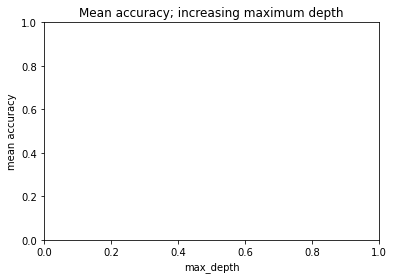

In [18]:
# plot
# plt.plot(range(10,100,10), accuracies4)
plt.title('Mean accuracy; increasing maximum depth')
plt.xlabel('max_depth')
plt.ylabel('mean accuracy')
plt.show()

In [19]:
# Result
# picture of plot saved as 'max_depth_10_100_10.png'
# runtime: 120 seconds or 2 minutes runtime

## Interlude

Because I had an idea and wanted to try it. Enjoy my random classifier not basd on anything but luck.

In [20]:
def random_picker(list):
    index = np.random.randint(len(list))
    value = list[index]
    return value

def randomest_random_forest():
    hyperparameter = []
    
    # n_estimators (50-200)
    hyperparameter.append('n_estimators:')
    n_estimator_choices = [i for i in range(50,201)]
    n_estimators = random_picker(n_estimator_choices)
    hyperparameter.append(n_estimators)

    # max_depth (5-300)
    hyperparameter.append('max_depth:')
    max_depth_choices = [i for i in range(5,301)]
    max_depth = random_picker(max_depth_choices)
    hyperparameter.append(max_depth)

    # max_features (auto, log2, int)
    hyperparameter.append('max_features:')
    max_features_choices = [i for i in range(0, X.shape[1])]
    max_features = random_picker(max_features_choices)
    hyperparameter.append(max_features)
    
    return hyperparameter, cross_val(RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features))

In [21]:
# Now we train a Random forest based on random hyperparameters and save them to 'log_randomest_random_forest.txt'

In [22]:
# hyperparameter, evaluation = randomest_random_forest()

# with open('log_randomest_random_forest.txt', mode="a+") as f:
#         f.write('hyperparameter: ' + str(hyperparameter) + '\n')
#         f.write("performance: " + str(evaluation) + "\n")

In [23]:
# To perform n interations of the randomest random forest, call 'perform_randomest_rf(n)'.
# This will append the evaluations into 'log_randomest_random_forest.txt'

def perform_randomest_rf(iterations):
    for i in trange(iterations):
        
        hyperparameter, evaluation = randomest_random_forest()
        
        with open('log_randomest_random_forest.txt', mode="a+") as f:
            f.write('hyperparameter: ' + str(hyperparameter) + '\n')
            f.write("performance: " + str(evaluation) + "\n")
            
    print('Done :)')

In [24]:
# After performing the randomest random forest, call 'best_performance_randomest_rf()' to get the best performance
# and the corresponding Hyperparameters

def best_performance_randomest_rf():
    with open('log_randomest_random_forest.txt', mode="r") as h:
        content = h.readlines()
        performances = []

        for i in content:
            if i.startswith('performance'):
                performances.append(i[13:-1])
        best_performance = max(performances)

        for i, e in enumerate(content):
            if best_performance in e:
                best_hypers = content[i-1][17:-2]

        print(f'Best performance: {best_performance}\nis given by hyperparameters: {best_hypers}')

In [25]:
# perform_randomest_rf(10)

In [26]:
best_performance_randomest_rf()

Best performance: 0.4789933348655482
is given by hyperparameters: 'n_estimators:', 175, 'max_depth:', 151, 'max_features:', 166


In [27]:
# Realized there is a skit inplementation similar to this, tried it in anther Notebook; see .txt for logs

# best result
# RandomForestRegressor(bootstrap=False, max_depth=50, max_features='sqrt', min_samples_leaf=2, n_estimators=800)
# Model Performance
# Average Error: 0.8146 degrees.
# Accuracy = 56.43%.
# Model Performance
# Average Error: 0.7858 degrees.
# Accuracy = 57.24%.
# Improvement of 1.44%.

In [28]:
# Random Forest Classifier - n_estimators=800, max_depth=50, max_features='sqrt', min_samples_leaf=2, bootstrap=False

start = time.time()
# best_crf = RandomForestClassifier(n_estimators=800, max_depth=50, max_features='sqrt', min_samples_leaf=2, bootstrap=False)
# best_crf_val = cross_val(best_crf)
end = time.time()
runtime = f'{end-start} seconds'

# print(f'Score for {best_crf}:')
# print(f'{best_crf_val} in {runtime} runtime.')

In [29]:
# Result
# accuracy: 46.32%
# runtime: 171 seconds or 2,85 minutes

In [30]:
# Random Forest Regressot - n_estimators=800, max_depth=50, max_features='sqrt', min_samples_leaf=2, bootstrap=False

start = time.time()
# best_rrf = RandomForestRegressor(n_estimators=800, max_depth=50, max_features='sqrt', min_samples_leaf=2, bootstrap=False)
# best_rrf_val = cross_val(best_rrf)
end = time.time()
runtime = f'{end-start} seconds'

# print(f'Score for {best_rrf}:')
# print(f'{best_rrf_val} in {runtime} runtime.')

In [31]:
# Result
# accuracy: 12.02%
# runtime: 154 seconds or 2,6 minutes

In [32]:
# This is odd, since in the other notebook (ruby3) this classifier achieved 57.24% accuracy.
# There, I have used strict training and test set seperation. I will try this again:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestRegressor

In [33]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [34]:
# best_random = RandomForestRegressor(bootstrap=False, max_depth=50, max_features='sqrt', min_samples_leaf=2, n_estimators=800)

In [35]:
# best_random.fit(X,y)
# evaluate(best_random, X_test, y_test)

In [36]:
# Holy fucking cow

In [37]:
rf = RandomForestRegressor(bootstrap=False, max_depth=50, max_features='sqrt', min_samples_leaf=2, n_estimators=800)
rf.fit(X,y)
cross_val(rf)

0.1190594786639477